<a href="https://colab.research.google.com/github/arnaldog12/Machine_Learning/blob/master/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

|  |  |
|-------------|-------|
| 🎓 **Aprendizado** | Supervisionado |
| 📋 **Tarefa** | Classificação e Regressão |
| 🔧 **Normalização** | Sim |
| ⭐ **Dificuldade** | Difícil |

# ⚙️ 0. Dependências

In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.datasets import make_blobs, make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 🔍 1. Introdução

Desenvolvido nos anos 90, o **Support Vector Machine (SVM)** é um dos algoritmos mais poderosos e populares de ML. Ele é utilizado principalmente para **classificação binária**, embora também possa ser adaptado para regressão e problemas multiclasse com o esquema *one-vs-all*.

Sua ideia central consiste em encontrar um **hiperplano de decisão** que separe as classes de forma ótima, maximizando a **margem**, ou seja, a distância entre o hiperplano e os pontos de dados mais próximos (os chamados **vetores de suporte**).

Antes de implementarmos o SVM, precisamos entender os seguintes conceitos sobre ele:
- Hiperplano
- Vetores de Suporte
- Kernel Trick
- Soft Margin
- Multiplicadores de Lagrange
- Condições de KTT
- SMO

Tais conceitos são explicados nas próximas seções.



## Hiperplano

Um **hiperplano** é uma generalização do conceito de plano para qualquer número de dimensões. É sempre uma estrutura que tem uma dimensão a menos que o espaço em que está inserido. Por exemplo:

- Em 2D, um hiperplano tem dimensão 1, ou seja, uma linha
- Em 3D, um hiperplano tem dimensão 2, ou seja, um plano
- Em 4D, um hiperplano tem dimensão 3, ou seja, um volume 3D

O hiperplano também pode ser um **subespaço afim**. Isto é, um subespaço vetorial que não necessariamente passa pela origem. Por exemplo:

- A reta $y = 2x$ passa pela origem → é um subespaço vetorial
- A reta $y = 2x + 3$ não passa pela origem → é um subespaço afim

Em outras palavras: em um espaço de $p$-dimensões, um hiperplano é um estrutura que tem exatamente $p-1$ dimensões e pode estar posicionada em qualquer lugar do espaço (não precisa passar pela origem).

> 💡 No contexto do SVM, o hiperplano é a fronteira de decisão que separa as classes. Se você tem dados com 100 features ($p=100$), o hiperplano de decisão será um objeto de 99 dimensões que divide o espaço de 100 dimensões em duas regiões - uma para cada classe.

A equação $w ⋅ x+b=0$ descreve exatamente esse hiperplano, onde:

- $w$ define a orientação (perpendicular ao hiperplano)
- $b$ define o deslocamento da origem (por isso é "afim" e não apenas "vetorial")

## Separação Linear com Margem Máxima

O SVM é um generalização do algoritmo conhecido como **Classificador de Margem Máxima** (_Maximal Margin Classifier_).

Suponha que tenhamos um dataset binário que seja linearmente separável. Podemos encontrar infinitas retas que separam dados separáveis:

![](https://miro.medium.com/v2/resize:fit:640/format:webp/1*2Q870UIoZIM8zuwd4Vbqjg.png)

Dessa forma, o **hiperplano ótimo** é aquele que separa as classes com maior margem. Isso pode ser visualizado como 2 hiperplanos (*support vectors*) com a maior distância entre eles. Logo, o hyperplano ótimo pode ser imaginado como a linha paralella que corta as duas margens no meio:

![](https://miro.medium.com/v2/resize:fit:640/format:webp/1*d36R6LJu_FxS5Em6XTtrTg.png)

No caso **linear**, o SVM busca um hiperplano $w \cdot x + b = 0$ que divide o espaço de forma a maximizar a margem entre as classes $y \in \{-1, 1\}$. Apenas os pontos mais próximos da fronteira — os **vetores de suporte** — são realmente relevantes para a definição do modelo. Essa característica torna o SVM robusto e eficiente, já que pontos mais distantes da margem não influenciam na decisão.


## Dados Não-Lineares e Kernel Trick

Por outro lado, quando os dados **não são linearmente separáveis**, utilizamos o **truque do kernel** (*kernel trick*). Através de funções de kernel, o SVM mapeia implicitamente os dados para um espaço de maior dimensão, onde a separação linear se torna possível. Os 3 kernels mais comuns são:

- **Linear**: $K(x_i, x_j) = x_i \cdot x_j$
- **RBF (Radial Basis Function)**: $K(x_i, x_j) = \exp\left(-\gamma \|x_i - x_j\|^2\right)$
- **Polinomial**: $K(x_i, x_j) = (\gamma \, x_i \cdot x_j + \text{coef}_0)^{\text{degree}}$

Um exemplo prático do *kernel trick* pode ser visualizado no exemplo abaixo. No gráfico da direita (bi-dimensional), podemos ver que temos dados não-linearmente separáveis. Aplicando o *kernel trick*, conseguimos separar os dados no espaço 3D com um hiperplano 2D.

![](https://www.eric-kim.net/eric-kim-net/posts/1/imgs/data_2d_to_3d_hyperplane.png)

Nesse exemplo, foi aplicado o kernel RBF. Podemos ver que os dados originais, quando projetados em 3D, se tornam um superfície "em forma de sino" (Gaussiana). Projetando essa separação de volta no gráfico 2D, conseguimos ver que é possível separar os dados. Nesse caso, o plano do gráfico 3D torna-se um círculo no gráfico 2D.

## Margem Suave (Soft Margin)

Para lidar com ruídos e sobreposição entre classes, o parâmetro $C$ controla a compensação entre maximizar a margem e minimizar erros de classificação.

- **C alto**: Penaliza fortemente os erros, resultando em margens menores mas menos erros de treinamento
- **C baixo**: Permite mais erros em favor de uma margem maior, oferecendo melhor generalização

## Multiplicadores de Lagrange

Os **Multiplicadores de Lagrange** são uma técnica matemática para resolver problemas de otimização com restrições. No SVM, são os valores $\alpha$ (**alpha**) que aparecem no código. Eles nos dizem **quão importante cada ponto de dados é para definir o hiperplano ótimo**.

Cada amostra (ponto) tem um valor $\alpha$ associado:

- $\alpha_i = 0$: o ponto não é importante (não é vetor de suporte)
- $0 < \alpha_i < C$: o ponto está exatamente na margem (**vetor de suporte**)
- $\alpha_i = C$: o ponto está violando a margem, ou seja:
    - ou está dentro da margem, mas ainda classificado corretamente
    - ou está mal classificado (lado errado do hiperplano)

Em outras palavras:

- Se $\alpha_i = 0$, o ponto não é vetor de suporte (fora da margem e classificado corretamente).
- Se $\alpha_i > 0$, o ponto é vetor de suporte (quanto maior o $\alpha$, mais importante é o ponto).

Na nossa implementação, teremos:

```py
self.alpha = alpha  # Array com todos os multiplicadores
self.support_alphas = alpha[sv_indices]  # Apenas os α's não zero
```

Uma propriedade importante dos multiplicadores de Langrange é a **Restrição da Soma**:

$$
∑ αᵢ ⋅ yᵢ = 0
$$

(Todos os α's devem "equilibrar" entre as classes)

## Condições de Karush-Kuhn-Tucker (KKT)

O problema do SVM é formulado como uma **otimização quadrática restrita**, onde buscamos os multiplicadores de Lagrange ($\alpha$) que satisfazem as **condições de Karush-Kuhn-Tucker (KKT)**. Essas condições são um conjunto de regras matemáticas que nos dizem quando encontramos a solução ótima de um problema de otimização com restrições.

Para dar um exemplo prático, imagine que você quer **subir o mais alto possível em uma montanha** (maximizar altura), mas **não pode sair de uma área cercada** (restrição). As condições KKT dizem que você está no ponto mais alto possível quando:

1. **Ou** você está no pico da montanha dentro da cerca
2. **Ou** você está encostado na cerca, e subir mais significaria atravessá-la

Para o SVM, as condições KKT verificam se cada ponto de treinamento está sendo tratado corretamente. Na nossa implementação do SMO, vamos verificar as condições KKT para determinar se uma amostra precisa ser otimizada na seguinte linha de código:

```python
if (y[i] * E_i < -self.tol and alpha[i] < self.C) or (y[i] * E_i > self.tol and alpha[i] > 0):
```

Onde:
- `E_i` é o erro de predição para o ponto i

Esta verificação corresponde às condições KKT para o problema do SVM:

- Se `y[i] * E_i < -tol` e `alpha[i] < C`: A amostra está dentro da margem mas classificada corretamente, violando KKT

- Se `y[i] * E_i > tol` e `alpha[i] > 0`: A amostra está do lado errado do hiperplano, violando KKT

As condições KKT garantem que:

- Amostras com `alpha[i] = 0` estão corretamente classificadas e fora da margem (**não é vetor de suporte**)

- Amostras com `0 < alpha[i] < C` estão exatamente na margem (**vetores de suporte**)

- Amostras com `alpha[i] = C` podem estar dentro da margem ou classificadas incorretamente (**representa um erro ou violação tolerada**).

> 🧠 Se há violação, o algoritmo ajusta os valores de α para corrigir

As condições KKT são como um **"certificado de otimalidade"**. Quando todos os pontos satisfazem essas condições, sabemos que encontramos o melhor hiperplano possível - aquele com a maior margem que respeita nossas restrições.

É como ter um checklist que confirma: "sim, este é realmente o melhor resultado que podemos obter dado o problema e suas limitações".

## Sequential Minimal Optimization (SMO)

Na prática, resolver esse problema de forma exata pode ser caro computacionalmente, por isso são utilizados métodos iterativos como o **SMO (Sequential Minimal Optimization)**.

O SMO é um algoritmo eficiente para resolver o problema de otimização do SVM. Ele quebra o grande problema de otimização em **subproblemas menores de dois multiplicadores por vez**, tornando o cálculo mais rápido e eficiente.

- **Sequential**: processa os pares um após o outro, em sequência

- **Minimal**: usa o menor subproblema possível (apenas 2 variáveis)

> 💡 O SMO é como afinar um violão: você não tenta ajustar todas as cordas ao mesmo tempo. Você ajusta duas cordas em relação uma à outra, depois passa para o próximo par, e continua até todas estarem afinadas.

### Passo a passo do SMO:

#### 1. **Seleção de Pares**

- Escolhe dois multiplicadores de Lagrange ($\alpha_i$ e $\alpha_j$) para otimizar por vez
- Na nossa implementação: uma amostra é escolhida por violação KKT, outra aleatoriamente.

> 📝 A escolha de uma amostra aleatória representa a versão simplificado do SMO, mas existem versões mais inteligentes.

#### 2. **Otimização em 2 Variáveis**

- Resolve um problema quadrático simples com apenas duas variáveis
- Calcula os limites L e H para manter a solução factível:

```python
if y[i] != y[j]:
    L = max(0, alpha[j] - alpha[i])
    H = min(self.C, self.C + alpha[j] - alpha[i])
else:
    L = max(0, alpha[i] + alpha[j] - self.C)
    H = min(self.C, alpha[i] + alpha[j])
```

#### 3. **Atualização dos Multiplicadores**

- Atualiza $\alpha_j$ usando uma fórmula fechada simples
- Ajusta $\alpha_i$ para manter a restrição linear de soma zero:

```python
alpha[j] = alpha_j_old - y[j] * (E_i - E_j) / eta
alpha[i] = alpha_i_old + y[i] * y[j] * (alpha_j_old - alpha[j])
```

Onde `eta` mede o quanto os 2 pontos são diferentes.

#### 4. **Atualização do Viés (bias)**

- Recalcula o viés baseado nos novos valores:

```python
b1 = self.b - E_i - y[i]*(alpha[i]-alpha_i_old)*K[i,i] - y[j]*(alpha[j]-alpha_j_old)*K[i,j]
b2 = self.b - E_j - y[i]*(alpha[i]-alpha_i_old)*K[i,j] - y[j]*(alpha[j]-alpha_j_old)*K[j,j]
self.b = (b1 + b2) / 2
```

✅ **Vantagens do SMO**:

- **Simplicidade**: Resolve problemas pequenos em vez de um grande
- **Eficiência**: Não precisa de matrizes grandes ou solvers complexos
- **Convergência Garantida**: Sempre encontra a solução ótima
- **Uso de Cache**: podemos pré-calcular a matriz do kernel para otimizar os cálculos

O loop principal do SMO fica:

```python
for _ in range(self.max_iter):
    for i in range(n_samples):
        if (violação KKT) # verifica se precisa otimizar
            # Seleciona par (i, j)
            # Otimiza os dois alphas
            # Atualiza alpha e bias bias
```


## Predição

Para classificar um novo ponto $x$, o SVM utiliza a função de decisão:

$$
f(x) = \text{sgn}\left( \sum_{i=1}^{N} \alpha_i y_i K(x_i, x) + b \right)
$$

onde:
- $\alpha_i$ são os **multiplicadores de Lagrange** (não nulos apenas para vetores de suporte);
- $y_i$ são os rótulos das amostras (convertidos para $-1$ ou $1$);
- $K(\cdot)$ é a função de kernel;
- $b$ é o viés (bias)


## Vantagens e Desvantagens

**✅ Vantagens do SVM**

1. **Eficaz em alta dimensionalidade**: Funciona bem mesmo quando dimensões > amostras

2. **Memória eficiente**: Usa apenas vetores de suporte para decisão

3. **Poucos hiperparams**: mais fácil de tunar.

**❌ Desvantagens do SVM**

1. **Complexidade computacional**
   - O(n²) a O(n³) - problemático para datasets grandes
   - Solução: Use LinearSVC ou SGDClassifier para big data

2. **Sensível a ruído**
   - Outliers podem se tornar vetores de suporte
   - Solução: Ajuste o parâmetro C cuidadosamente


# 🎲 2. Dados

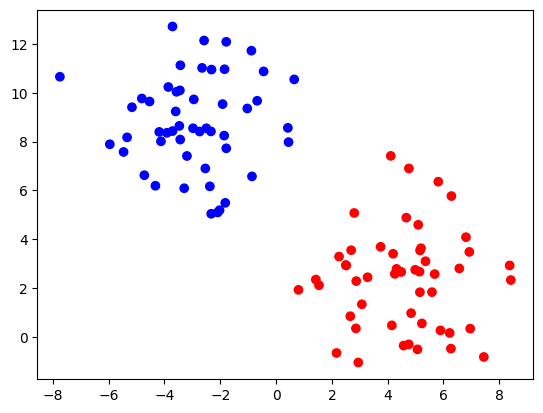

(80, 2) (80,)
(20, 2) (20,)


In [ ]:
# Dados 1: Blobs 2D SEM interseção
x, y = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=2, random_state=42)
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='bwr')
plt.show()

# Dados 1: Blobs 2D COM interseção
# x, y = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=3, random_state=42)
# plt.scatter(x[:, 0], x[:, 1], c=y, cmap='bwr')
# plt.show()

# Dados 3: 20-D
# x, y = make_classification(n_samples=100, n_features=10, n_informative=5, n_classes=2, random_state=42)

y = np.where(y == 0, -1, 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

# 💻 3. Implementação

In [ ]:
class SVM:
    def __init__(self, kernel='linear', C=1.0, gamma='scale', degree=3, coef0=0.0, max_iter=1000, tol=1e-3):
        self.kernel = kernel
        self.C = C
        self.gamma = gamma
        self.degree = degree
        self.coef0 = coef0
        self.max_iter = max_iter
        self.tol = tol
        self.alpha = None
        self.b = 0
        self.support_vectors = None
        self.support_labels = None
        self.support_alphas = None

    def _initialize_gamma(self, X):
        if self.gamma == 'scale':
            return 1.0 / (X.shape[1] * X.var())
        elif self.gamma == 'auto':
            return 1.0 / X.shape[1]
        else:
            return self.gamma

    def _kernel(self, x1, x2):
        if self.kernel == 'linear':
            return np.dot(x1, x2)
        elif self.kernel == 'rbf':
            return np.exp(-self.gamma * np.linalg.norm(x1 - x2)**2)
        elif self.kernel == 'poly':
            return (self.gamma * np.dot(x1, x2) + self.coef0)**self.degree
        else:
            raise ValueError("Kernel não suportado")

    def _decision_function(self, X):
        return np.array([self._predict_single(x) for x in X])

    def _predict_single(self, x):
        result = 0
        for sv_y, sv_a, sv in zip(self.support_labels, self.support_alphas, self.support_vectors):
            result += sv_a * sv_y * self._kernel(sv, x)
        return result + self.b

    def fit(self, X, y):
        y = y.copy()
        y[y == 0] = -1  # Converter para -1 e 1

        n_samples, n_features = X.shape

        # Inicializar gamma
        self.gamma = self._initialize_gamma(X)

        # Inicializar alphas
        alpha = np.zeros(n_samples)

        # Pré-calcular a matriz do kernel
        K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                K[i, j] = self._kernel(X[i], X[j])

        # Implementação simplificada do SMO
        for _ in range(self.max_iter):
            for i in range(n_samples):
                # Calcular erro para a amostra i
                E_i = np.sum(alpha * y * K[:, i]) + self.b - y[i]

                # Verificar violação das condições KKT
                if (y[i] * E_i < -self.tol and alpha[i] < self.C) or (y[i] * E_i > self.tol and alpha[i] > 0):
                    # Selecionar segunda amostra aleatoriamente
                    j = np.random.choice(list(range(i)) + list(range(i+1, n_samples)))

                    # Calcular erro para a amostra j
                    E_j = np.sum(alpha * y * K[:, j]) + self.b - y[j]

                    alpha_i_old, alpha_j_old = alpha[i], alpha[j]

                    # Calcular limites L e H
                    if y[i] != y[j]:
                        L = max(0, alpha[j] - alpha[i])
                        H = min(self.C, self.C + alpha[j] - alpha[i])
                    else:
                        L = max(0, alpha[i] + alpha[j] - self.C)
                        H = min(self.C, alpha[i] + alpha[j])

                    if L == H:
                        continue

                    # Calcular eta
                    eta = 2 * K[i, j] - K[i, i] - K[j, j]
                    if eta >= 0:
                        continue

                    # Atualizar alpha_j
                    alpha[j] = alpha_j_old - y[j] * (E_i - E_j) / eta

                    # Clip alpha_j entre L e H
                    alpha[j] = max(L, min(H, alpha[j]))

                    # Verificar mudança significativa
                    if abs(alpha[j] - alpha_j_old) < 1e-5:
                        continue

                    # Atualizar alpha_i
                    alpha[i] = alpha_i_old + y[i]*y[j]*(alpha_j_old - alpha[j])

                    # Atualizar bias
                    b1 = self.b - E_i - y[i]*(alpha[i]-alpha_i_old)*K[i,i] - y[j]*(alpha[j]-alpha_j_old)*K[i,j]
                    b2 = self.b - E_j - y[i]*(alpha[i]-alpha_i_old)*K[i,j] - y[j]*(alpha[j]-alpha_j_old)*K[j,j]

                    if 0 < alpha[i] < self.C:
                        self.b = b1
                    elif 0 < alpha[j] < self.C:
                        self.b = b2
                    else:
                        self.b = (b1 + b2) / 2

        # Armazenar vetores de suporte
        sv_indices = alpha > 1e-5
        self.support_vectors = X[sv_indices]
        self.support_labels = y[sv_indices]
        self.support_alphas = alpha[sv_indices]
        self.alpha = alpha

    def predict(self, X):
        return np.sign(self._decision_function(X))

In [ ]:
# kernel linear -> C
# kernel rbf -> C e gamma
# kernel poly -> C, gamma, degree e coef0

svm = SVM(kernel='rbf', C=10)
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)
accuracy_score(y_test, y_pred)

1.0

### Comparação com o Scikit-Learn



In [ ]:
svc = SVC(kernel='rbf', C=10)
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
accuracy_score(y_test, y_pred)

1.0

### Fronteira de Decisão

> ⚠️ Somente para os dados 2D (blobs)

In [ ]:
def plot_decision_boundary(model, X, y, title="SVM Decision Boundary"):
    if X.shape[1] != 2:
        return

    plt.figure(figsize=(10, 6))

    # Criar grid para plotar fronteira
    h = 0.1
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predição no grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plotar fronteira e margens
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

    # Plotar pontos
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm',
                edgecolors='black', s=50)

    # Destacar vetores de suporte
    if model.support_vectors is not None:
        plt.scatter(model.support_vectors[:, 0],
                   model.support_vectors[:, 1],
                   s=200, facecolors='none',
                   edgecolors='green', linewidths=2,
                   label='Vetores de Suporte')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.legend()
    plt.show()

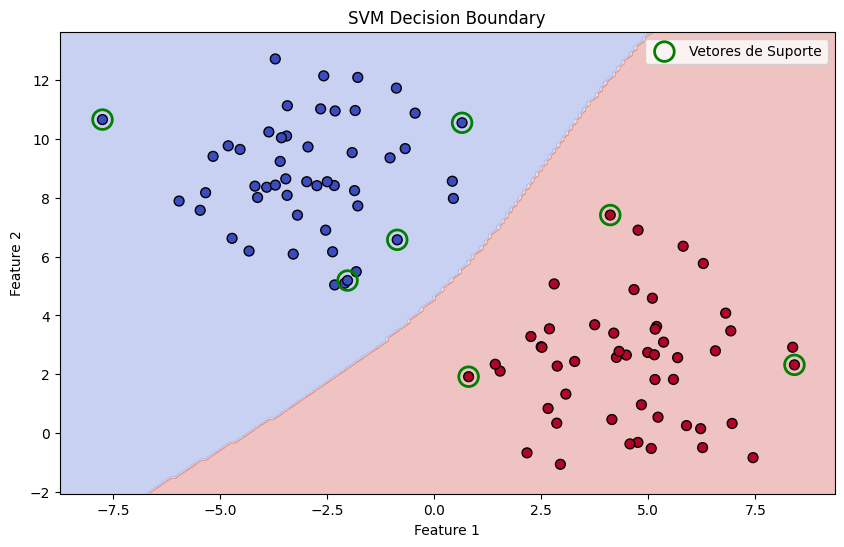

In [ ]:
# com kernel rbf ou poly e C >= 10 (ou 100), dá pra ver curva bem definida na fronteira de decisão
plot_decision_boundary(svm, x, y)

# 💭 Considerações Finais

**Q: Quando usar SVM vs Deep Learning?**

A: Use SVM para datasets pequenos/médios (< 100k amostras) com features bem definidas. Use Deep Learning para dados não estruturados (imagens, texto) com milhões de amostras.
___

**Q: Como escolher o kernel?**

A: Comece com linear (mais rápido). Se não funcionar, tente RBF.
   Use polinomial para relações específicas conhecidas.
___

**Q: O que o parâmetro C realmente faz?**

A: C controla o trade-off entre **maximizar a marger** e **minimizar erros de classificação**:
- Quanto menor o C (< 0.1 - Margem Suave):
    - ✅ Margem MAIOR
    - ✅ Tolera mais erros de classificação
    - ✅ Menos sensível a outliers
    - ✅ Melhor generalização (geralmente)
    - ❌ Pode ter underfitting
    - 📍 "Prefiro uma margem grande mesmo errando alguns pontos"

- Quanto maior o C (> 100 - Margem Dura):
    - ❌ Margem MENOR
    - ❌ Não tolera erros (tenta classificar tudo corretamente)
    - ❌ Muito sensível a outliers
    - ❌ Risco de overfitting
    - 📍 "Quero classificar TODOS os pontos corretamente"

> 💡 Na prática, use valores entre 0.1 e 10
___

**Q: O que o parâmetro Gamma realmente faz?**

A: Gamma controla quanto cada ponto influencia na fronteira de decisão. Ou seja, a "flexibilidade" da fronteira.

- Quanto menor o gamma (< 0.1):
    - ✅ Fronteira suave e simples
    - ✅ Menos vetores de suporte
    - ✅ Melhor generalização
    - ❌ Risco de underfitting
    - 📍 Cada ponto influencia regiões distantes

- Quanto maior o gamma (> 10):
    - ❌ Fronteira muito complexa e irregular
    - ❌ Muitos vetores de suporte
    - ❌ Risco de overfitting
    - 📍 Cada ponto só influencia vizinhança imediata

> 💡 Na prática, use valores entre 0.001 e 1. Para muitas features, o uso do valor `auto` do scikit-learn (`gamma = 1/n_features`) é uma boa escolha em geral. Para poucos dados, gamma menor é indicado para evitar overfitting. Para muitas dados, gamma maior ajuda capturar padrões complexos.



## C vs Gamma

![](https://amueller.github.io/aml/_images/svm_c_gamma.png)

# 📖 Referências

- https://medium.com/data-science/implementing-svm-from-scratch-784e4ad0bc6a